In [55]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime




# plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [56]:
df = pd.read_csv("./copper-prices-historical-chart-data1.csv",parse_dates=['date'],dayfirst=True,index_col='date')
df[:30]


,value
date,
1959-07-02,0.2930
1959-07-06,0.2910
1959-07-07,0.2820
1959-07-08,0.2846
1959-07-09,0.2760
1959-07-10,0.2757
1959-07-13,0.2780
1959-07-14,0.2855
1959-07-15,0.2873


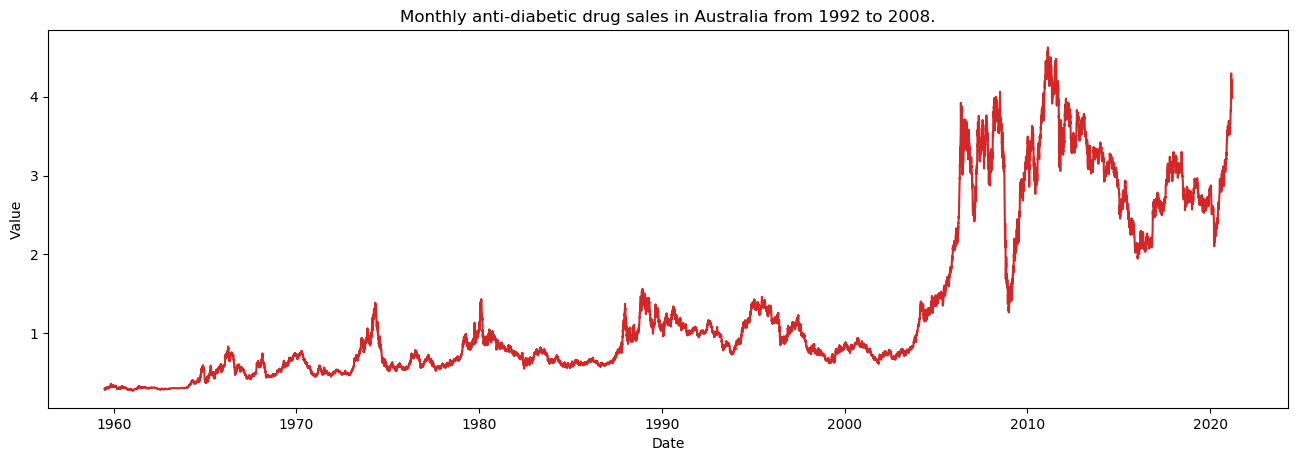

In [57]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [60]:
# df.set_index('date', inplace=True)
# df.index = pd.to_datetime(df.index)
df=df.resample('1M').mean()


In [61]:
df.to_excel("test_02.xlsx")


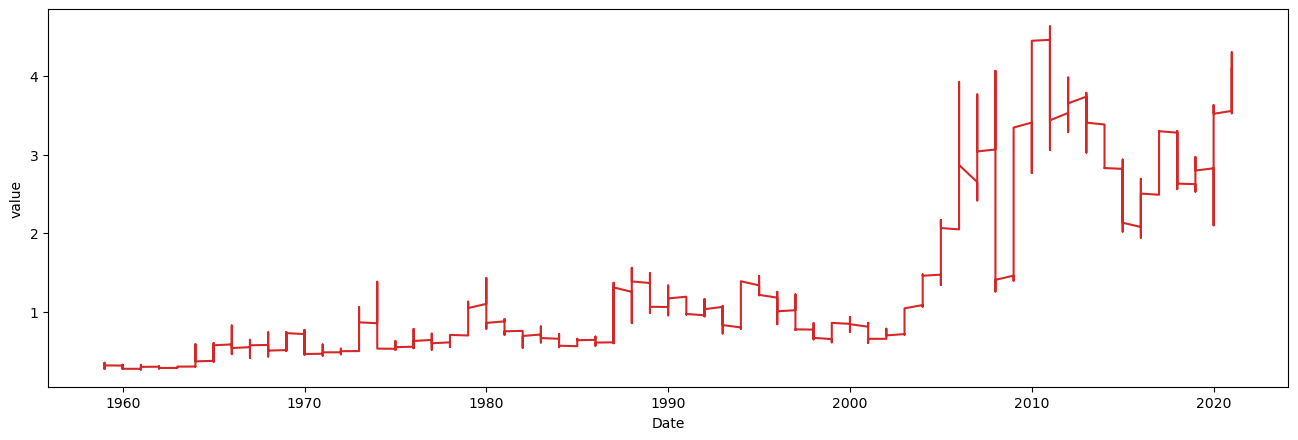

In [130]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.year, y=df.value, title='')    
